# Micheslon

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from pathlib import Path

In [13]:
data_folder = Path("data")

In [16]:
# Load data
df_mcson = pd.read_csv(data_folder / "michelson.csv")
df_mcson["Delta n [1E4]"] = df_mcson["Delta n"] * 1E4
df_mcson

,Delta n,Presion,Error P,Delta n [1E4]
0,0.000000,939,2,0.000
1,0.000032,828,2,0.316
2,0.000063,711,2,0.633
3,0.000095,602,2,0.949
4,0.000127,487,2,1.266
5,0.000158,373,3,1.582


Pendiente: -0.0028
Intercepto: 2.6267


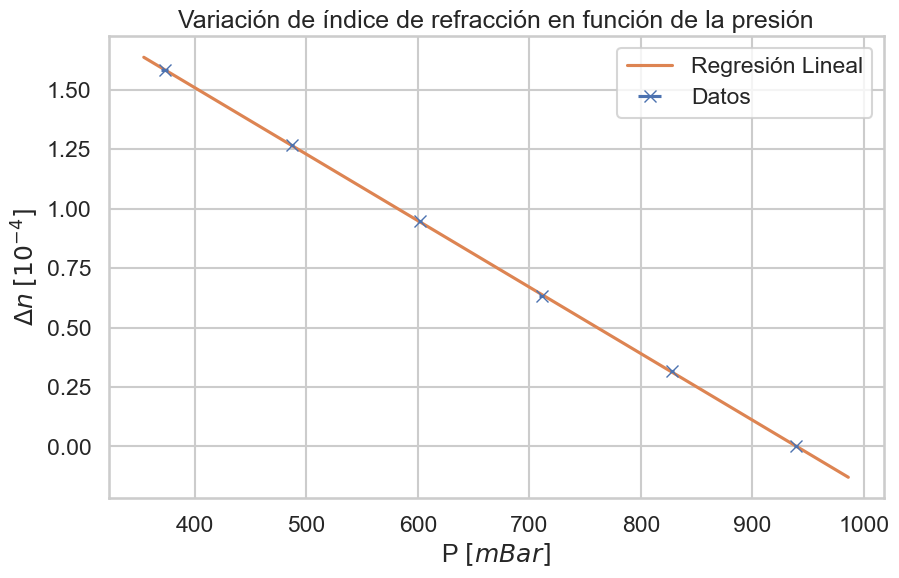

In [62]:
X = df_mcson["Presion"]
X_error = df_mcson["Error P"]
y = df_mcson["Delta n [1E4]"]

# Fit linear regression
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# Predict
X_pred = np.linspace(X.min()*0.95, X.max()*1.05, 100)
y_pred = model.predict(X_pred.reshape(-1, 1))
					   
# Plot
plt.figure(figsize=(10, 6))
sns.set_style()
sns.set_context("talk")
palette = sns.color_palette("deep")
data_color = palette[0]
fit_color = palette[1]

plt.plot(X_pred, y_pred, label="Regresión Lineal", color=fit_color)
plt.errorbar(X, y, xerr=X_error, fmt='x', label="Datos", color=data_color)
plt.xlabel(r"P $[mBar]$")
plt.ylabel(r"$\Delta n$ $[10^{-4}]$")
plt.legend()
plt.title("Variación de índice de refracción en función de la presión")

print(f"Pendiente: {model.coef_[0]:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")

In [64]:
from scipy.stats import linregress

results = linregress(X, y)

slope = results.slope
intercept = results.intercept
r_value = results.rvalue
p_value = results.pvalue
std_err = results.stderr
intercept_std_err = results.intercept_stderr


print(f"Pendiente: {slope:.6f} +- {std_err:.6f}")
print(f"Intercepto: {intercept:.3f} +- {intercept_std_err:.3f}")
print(f"R^2: {r_value**2:.6f}")

Pendiente: -0.002795 +- 0.000010
Intercepto: 2.627 +- 0.007
R^2: 0.999950


# Fabry-Perot

In [1]:
import sympy as sp

In [5]:
d, m = sp.symbols("d m")

d_err, m_err = sp.symbols("delta_d delta_m")

l = 2*d/m

In [6]:
l_err = sp.sqrt((sp.diff(l, d)*d_err)**2 + (sp.diff(l, m)*m_err)**2)

In [12]:
print(sp.latex(l_err.simplify()))

2 \sqrt{\frac{d^{2} \delta_{m}^{2} + \delta_{d}^{2} m^{2}}{m^{4}}}
